In [1]:
%cd drive/MyDrive

/content/drive/MyDrive


In [2]:
%cd Extract_text_project/

/content/drive/MyDrive/Extract_text_project


In [3]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr
import pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 22 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 0s (12.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like 

In [4]:
!pip install spacy
!python -m spacy download en
import spacy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-15 16:50:35.640329: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-15 16:50:37.050258: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-15 16:50:37.050381: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could no

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [5]:
import numpy as np
import pandas as pd
import cv2
import PIL

In [7]:
from google.colab.patches import cv2_imshow

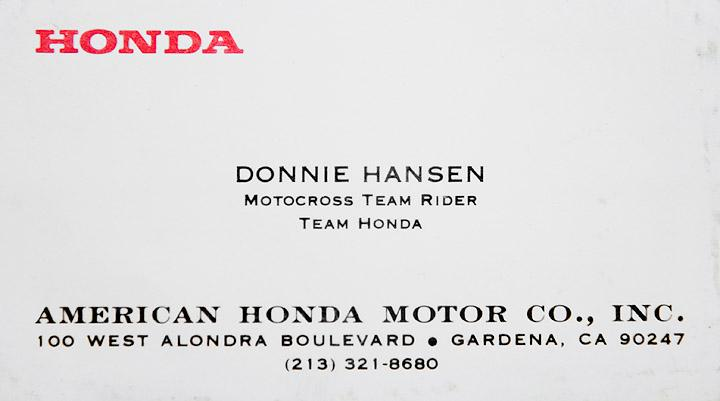

In [11]:
img_cv = cv2.imread('./Selected/052.jpeg')
cv2_imshow(img_cv)

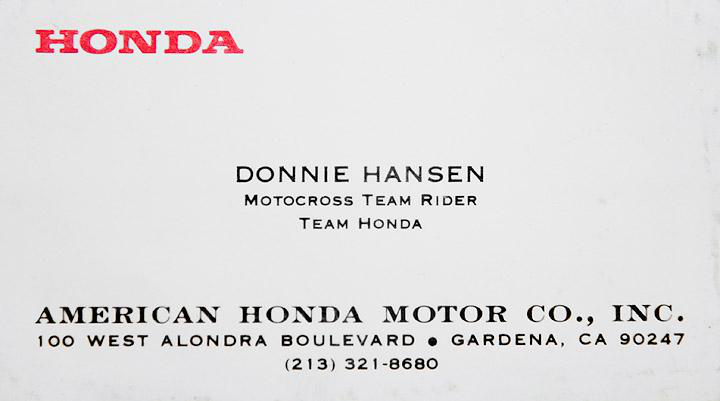

In [15]:
img_pil = PIL.Image.open('./Selected/052.jpeg')
img_pil

Text from Image

In [16]:
text_cv = pytesseract.image_to_string(img_cv)

In [18]:
print(text_cv)

HONDA

DONNIE HANSEN
MOTOCROSS TEAM RIDER
TEAM HONDA

AMERICAN HONDA MOTOR CO., INC.
100 WEST ALONDRA BOULEVARD e GARDENA, CA 90247
(213) 321-8680



In [20]:
text_pil = pytesseract.image_to_string(img_pil)
print(text_pil)

HONDA

DONNIE HANSEN
MOTOCROSS TEAM RIDER
TEAM HONDA

AMERICAN HONDA MOTOR CO., INC.
100 WEST ALONDRA BOULEVARD e GARDENA, CA 90247
(213) 321-8680



Image to Data

In [27]:
data = pytesseract.image_to_data(img_cv)
datalist = list(map(lambda x: x.split('\t'), data.split('\n')))
df = pd.DataFrame(datalist[1:], columns=datalist[0])

In [30]:
df.head(10)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,720,401,-1,
1,2,1,1,0,0,0,36,29,207,25,-1,
2,3,1,1,1,0,0,36,29,207,25,-1,
3,4,1,1,1,1,0,36,29,207,25,-1,
4,5,1,1,1,1,1,36,29,207,25,96,HONDA
5,2,1,2,0,0,0,237,166,246,63,-1,
6,3,1,2,1,0,0,237,166,246,63,-1,
7,4,1,2,1,1,0,237,166,246,16,-1,
8,5,1,2,1,1,1,237,166,112,16,96,DONNIE
9,5,1,2,1,1,2,364,166,119,16,95,HANSEN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   level      38 non-null     object
 1   page_num   37 non-null     object
 2   block_num  37 non-null     object
 3   par_num    37 non-null     object
 4   line_num   37 non-null     object
 5   word_num   37 non-null     object
 6   left       37 non-null     object
 7   top        37 non-null     object
 8   width      37 non-null     object
 9   height     37 non-null     object
 10  conf       37 non-null     object
 11  text       37 non-null     object
dtypes: object(12)
memory usage: 3.7+ KB


In [32]:
df.dropna(inplace=True) #drop missing value

In [33]:
col_int = ['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top','width', 'height', 'conf']
df[col_int] = df[col_int].astype(int)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   level      37 non-null     int64 
 1   page_num   37 non-null     int64 
 2   block_num  37 non-null     int64 
 3   par_num    37 non-null     int64 
 4   line_num   37 non-null     int64 
 5   word_num   37 non-null     int64 
 6   left       37 non-null     int64 
 7   top        37 non-null     int64 
 8   width      37 non-null     int64 
 9   height     37 non-null     int64 
 10  conf       37 non-null     int64 
 11  text       37 non-null     object
dtypes: int64(11), object(1)
memory usage: 3.8+ KB


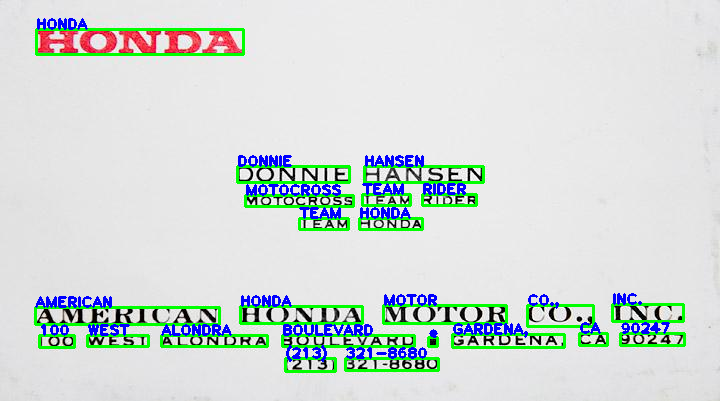

In [42]:
image = img_cv.copy()
level = 'word'
for l,x,y,w,h,c,txt in df[['level', 'left', 'top', 'width', 'height', 'conf', 'text']].values:
  if level == 'page':
    if l == 1:
      cv2.rectangle(image, (x,y), (x+w, y+h), (0,0,0), 2)
    else:
      continue

  elif level == 'block':
    if l == 2:
      cv2.rectangle(image, (x,y), (x+w, y+h), (255,0,0), 2)
    else:
      continue

  elif level == 'para':
    if l == 3:
      cv2.rectangle(image , (x,y), (x+w, y+h), (0, 255, 0), 2)
    else:
      continue

  elif level == 'line':
    if l == 4:
      cv2.rectangle(image , (x,y), (x+w, y+h), (0, 0, 255), 2)
    else:
      continue

  elif level == 'word':
    if l == 5:
      cv2.rectangle(image , (x,y), (x+w, y+h), (0, 255, 0), 2)
      cv2.putText(image, txt, (x,y), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,0), 2)
    else:
      continue

cv2_imshow(image)